In [15]:
import warnings
import math
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import time
import pickle
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.io as scio
from scipy.stats import norm
import statsmodels.api as sm
from pylab import mpl
plt.rcParams.update({"font.family":"STIXGeneral","font.size":20,"mathtext.fontset":"cm"})

plt.rcParams['font.family'] = 'Microsoft JhengHei'  # 或 'SimHei' 等
plt.rcParams['axes.unicode_minus'] = False  # 使負號顯示正常
plt.rcParams.update({"font.family": "STIXGeneral", "font.size": 20, "mathtext.fontset": "cm"})

1. 用歐拉法求初值問題

的數值解（取 h=0.05），並將計算結果與精確解

進行比較(計算誤差)，並畫出圖像

1.0000 0.0500 1.0000 0.0000
1.0017 0.1000 1.0008 -0.0008
1.0050 0.1500 1.0033 -0.0017
1.0099 0.2000 1.0074 -0.0025
1.0165 0.2500 1.0132 -0.0033
1.0245 0.3000 1.0204 -0.0041
1.0341 0.3500 1.0291 -0.0049
1.0450 0.4000 1.0393 -0.0057
1.0572 0.4500 1.0507 -0.0065
1.0706 0.5000 1.0634 -0.0072
1.0852 0.5500 1.0772 -0.0079
1.1007 0.6000 1.0921 -0.0086
1.1172 0.6500 1.1079 -0.0093
1.1346 0.7000 1.1247 -0.0099
1.1527 0.7500 1.1422 -0.0105
1.1715 0.8000 1.1604 -0.0111
1.1910 0.8500 1.1793 -0.0117
1.2109 0.9000 1.1987 -0.0122
1.2314 0.9500 1.2187 -0.0127
1.2523 1.0000 1.2391 -0.0132
1.2735 1.0500 1.2599 -0.0136
1.2951 1.1000 1.2811 -0.0140
1.3170 1.1500 1.3026 -0.0144
1.3391 1.2000 1.3243 -0.0148


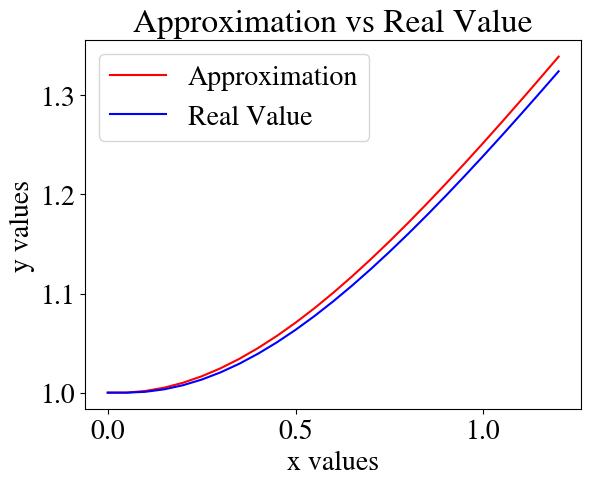

[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-8.34026815e-04  0.00000000e+00]
 [-1.66663306e-03  1.99829674e+00]
 [-2.49495556e-03  1.49700352e+00]
 [-3.31608582e-03  1.32911618e+00]
 [-4.12709598e-03  1.24456851e+00]
 [-4.92508151e-03  1.19335279e+00]
 [-5.70721783e-03  1.15880678e+00]
 [-6.47082520e-03  1.13379678e+00]
 [-7.21343464e-03  1.11476271e+00]
 [-7.93284749e-03  1.09973236e+00]
 [-8.62718291e-03  1.08752663e+00]
 [-9.29490957e-03  1.07739799e+00]
 [-9.93486021e-03  1.06884958e+00]
 [-1.05462300e-02  1.06153783e+00]
 [-1.11285607e-02  1.05521695e+00]
 [-1.16817139e-02  1.04970573e+00]
 [-1.22058372e-02  1.04486698e+00]
 [-1.27013253e-02  1.04059436e+00]
 [-1.31687805e-02  1.03680366e+00]
 [-1.36089732e-02  1.03342699e+00]
 [-1.40228053e-02  1.03040876e+00]
 [-1.44112762e-02  1.02770280e+00]
 [-1.47754535e-02  1.02527030e+00]]


In [16]:
xx = [0]  
yy = [1]  
h = 0.05  # 步长
x = 0  # 初始 x 值
y = 1  # 初始 y 值

a = np.arange(0, 1.2, h)  # 创建 x 值的数组
ry = [1]  
error1 = [0]  

# 迭代计算
for i in range(len(a)):
    y = y + h * ((2/3) * x * y**(-2))  # 更新 y 值
    realy = ((1 + (x**2))**(1/3))  # 计算真实 y 值
    x = x + h  # 更新 x 值

    xx.append(x)  # 将新的 x 值添加到列表
    yy.append(y)  # 将新的 y 值添加到列表
    ry.append(realy)  # 将真实 y 值添加到列表
    error = realy - y  # 计算误差
    error1.append(error)  # 将误差添加到误差列表

    # 输出当前的 y, x, 真实 y 和误差
    print(format(y, '.4f'), format(x, '.4f'), format(realy, '.4f'), format(error, '.4f'))

# 绘制函数图像
plt.plot(xx, yy, 'r', label='Approximation')  # 绘制近似值
plt.plot(xx, ry, '-b', label='Real Value')  # 绘制真实值
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Approximation vs Real Value')
plt.legend()
plt.show()

# 计算误差比例
b = np.zeros((len(a)+1, 2))  
b[:, 0] = error1  
for i in range(1, len(error1)):  # 从1开始计算比例
    if error1[i-1] != 0:  # 避免除以0
        b[i, 1] = error1[i] / error1[i-1]  # 计算误差比例

print(b)


2.某跳傘者在t=0時刻從飛機上跳出，假設初始時刻垂直速度為0，且跳傘者垂直下落。已知空氣阻力為Fair=cv2，其中c為常數，v為垂直速度，向下方向為正。
 （1）寫出此跳傘者的速度滿足的微分方程；
 （2）若此跳傘者的質量為M=70kg，且已知c=0.27kg/m，請利用向前歐拉法和向後歐拉法計算t≤20s的速度，並畫出圖像（取h=0.1s)。

C:\Users\hp\AppData\Local\Temp\ipykernel_39672\2907438128.py:4: RuntimeWarning: invalid value encountered in double_scalars
  b[:, 1] = b[i+1, 0]/b[i, 0]
C:\Users\hp\AppData\Local\Temp\ipykernel_39672\2907438128.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  b[:, 1] = b[i+1, 0]/b[i, 0]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 0.00000000e+00  1.02770280e+00]
 [ 0.00000000e+00  1.02770280e+00]
 [-8.34026815e-04  1.02770280e+00]
 [-1.66663306e-03  1.02770280e+00]
 [-2.49495556e-03  1.02770280e+00]
 [-3.31608582e-03  1.02770280e+00]
 [-4.12709598e-03  1.02770280e+00]
 [-4.92508151e-03  1.02770280e+00]
 [-5.70721783e-03  1.02770280e+00]
 [-6.47082520e-03  1.02770280e+00]
 [-7.21343464e-03  1.02770280e+00]
 [-7.93284749e-03  1.02770280e+00]
 [-8.62718291e-03  1.02770280e+00]
 [-9.29490957e-03  1.02770280e+00]
 [-9.93486021e-03  1.02770280e+00]
 [-1.05462300e-02  1.02770280e+00]
 [-1.11285607e-02  1.02770280e+00]
 [-1.16817139e-02  1.02770280e+00]
 [-1.22058372e-02  1.02770280e+00]
 [-1.27013253e-02  1.02770280e+00]
 [-1.31687805e-02  1.02770280e+00]
 [-1.36089732e-02  1.02770280e+00]
 [-1.40228053e-02  1.02770280e+00]
 [-1.44112762e-02  1.02770280e+00]
 [-1.47754535e-02  1.02770280e+00]]
[[ 0.05        0.49        0.4899537 ]
 [ 0.1         0.9799537   0.97976857]
 [ 0.15        1.46976849  1.46935219]
 [ 0.2 

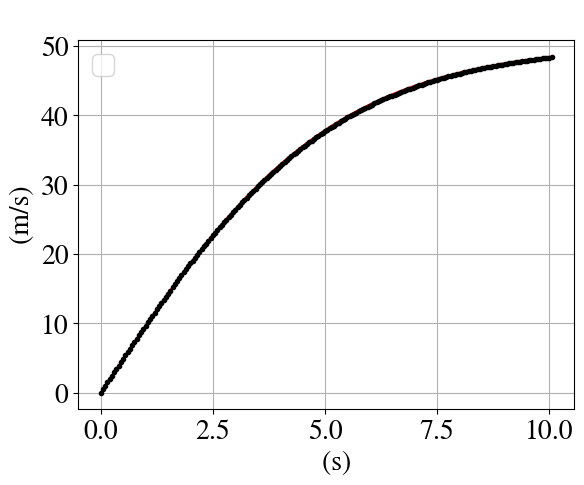

In [17]:
b=np.zeros((len(a)+1,2))
for i in range(len(a)-1):
    b[:, 0] =error1
    b[:, 1] = b[i+1, 0]/b[i, 0]
print(b)
M=70
c=0.27
h=0.1
g=9.8
# y=(M*g-c*y**2)/M
t=np.arange(0,20.1,0.1)
# v=y*t
xx = [0]
yy = [0]
yy1=[0]
ry = [0]

error1= [0]
h = 0.05  # 由题意得step步长为0.05
x = 0  # 初始x值
y = 0  # 初始y值
y1=0
b=np.zeros(((len(t)),3))
for i in range(0,len(t)):  # 由干可得x每次进0.1

    y=y+h*(M*g-c*y**2)/M
    y1=(-1+np.sqrt(1+4*c*h/M*(y1+h*g)))/(2*c*h/M)
    # realy=((M*g-c*y**2)/M)*t
    x = x + h
    b[i:,0]=x
    b[i:,1]=y
    b[i:, 2] = y1
    xx.append(x)
    yy.append(y)
    yy1.append(y1)
    # b[i:,3]=realy
print(b)
plt.plot(xx, yy,'r',xx, yy1,'k.')  # 绘制函数图像
plt.xlabel('時間 (s)')
plt.ylabel('速度 (m/s)')
plt.title('跳傘者速度隨時間變化')
plt.legend()
plt.grid()
plt.show()

自感應迴路中電流I(t)滿足下式：

其中L=50 mH, R=50Ω, E=10V.利用梯形法、龍格-庫特法(梯形公式和中點公式)畫出0<t<0.02s的電流曲線(取h=0.0001s) 。

C:\Users\hp\AppData\Local\Temp\ipykernel_39672\3272090942.py:42: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from current font.
  plt.savefig('myfun_Homework_13_3_TLK_JR202_20030047_liuhaibo.eps', dpi=600, bbox_inches='tight')
C:\Users\hp\AppData\Local\Temp\ipykernel_39672\3272090942.py:42: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from current font.
  plt.savefig('myfun_Homework_13_3_TLK_JR202_20030047_liuhaibo.eps', dpi=600, bbox_inches='tight')
C:\Users\hp\AppData\Local\Temp\ipykernel_39672\3272090942.py:42: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  plt.savefig('myfun_Homework_13_3_TLK_JR202_20030047_liuhaibo.eps', dpi=600, bbox_inches='tight')
C:\Users\hp\AppData\Local\Temp\ipykernel_39672\3272090942.py:42: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from current font.
  plt.savefig('myfun_Homework_13_3_TLK_JR202_20030047_liuhaibo.eps', dpi=600, bbox_inches='tight')
C:\U

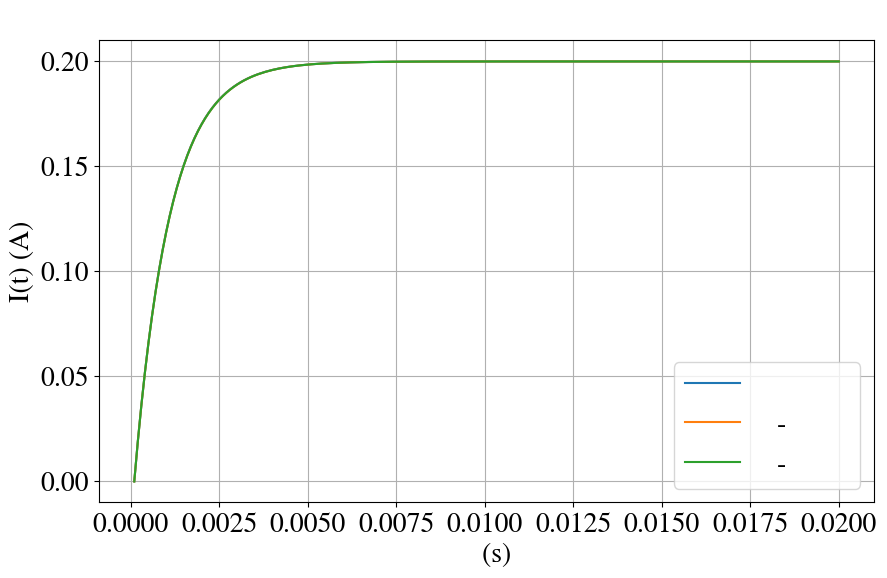

In [18]:
# 常數定義
L = 50e-3  # 自感應 (H)
R = 50  # 電阻 (Ω)
E = 10  # 源電壓 (V)
h = 0.0001  # 步長 (s)
T = np.arange(0.0001, 0.02 + 0.0001, 0.0001)  # 時間數組
n = len(T)

# 初始化電流數組
trap_I = np.zeros(n)
RungKu = np.zeros(n)
RungK_center = np.zeros(n)
trap_I[0] = 0
RungKu[0] = 0
RungK_center[0] = 0

# 定義微分方程
def equation_diff(x):
    return (-R * x + E) / L

# 梯形法、龍格-庫特法
for i in range(0, n - 1):
    # 梯形法
    trap_I[i + 1] = ((1 - h * R / (2 * L)) * trap_I[i] + h * E / L) / (1 + h * R / (2 * L))

    # 龍格-庫特法（梯形公式）
    RungKu[i + 1] = RungKu[i] + h / 2 * (equation_diff(RungKu[i]) + equation_diff(RungKu[i] + h * equation_diff(RungKu[i])))

    # 龍格-庫特法（中點公式）
    RungK_center[i + 1] = RungK_center[i] + h * equation_diff(RungKu[i] + h / 2 * equation_diff(RungKu[i]))

# 繪圖
plt.figure(figsize=(10, 6))
plt.plot(T, trap_I, label='梯形法')
plt.plot(T, RungKu, label='龍格-庫特法（梯形公式）')
plt.plot(T, RungK_center, label='龍格-庫特法（中點公式）')
plt.xlabel('時間 (s)')
plt.ylabel('電流 I(t) (A)')
plt.title('自感應迴路中電流隨時間變化')
plt.legend()
plt.grid()
plt.savefig('myfun_Homework_13_3_TLK_JR202_20030047_liuhaibo.eps', dpi=600, bbox_inches='tight')
plt.show()

買房貸款100萬元，分30年還款，年利率3.25%，試構建等額本金和等額本息兩種還款方式的貸款餘額微分方程，利用歐拉法求解這兩個微分方程，並畫出貸款餘額曲線。

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


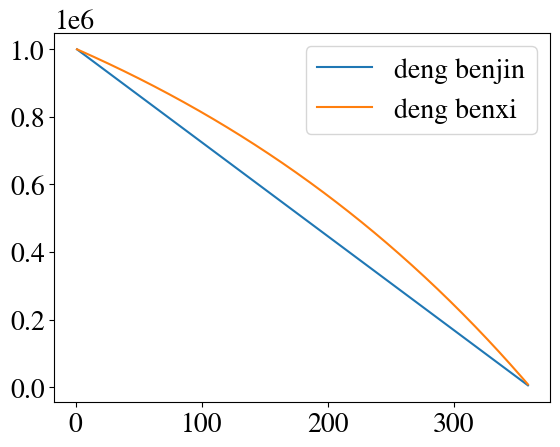

In [21]:
L = 1000000
y = 30
r = 0.0325


# 等额本金
x1 = np.arange(1, 12*30, 1)
y1 = np.zeros_like(x1)
y1[0] = L
for i in range(len(y1)-1):
    y1[i+1] = y1[i] - L / 30 / 12

# 等额本息
def equation(x):
    x0 = L
    for i in range(360):
        x1 = x0 - (x - x0 * r / 12)
        x0 = x1
    return x0


def rootfinding_bisection(a, b, e):
    i = 1
    c = (a + b) / 2
    sign_fc = np.sign(equation(c))
    sign_fa = np.sign(equation(a))
    sign_fb = np.sign(equation(b))
    while b - c > e and i < 1000:
        i += 1
        if sign_fb * sign_fc <= 0:
            a = c
            sign_fa = sign_fc
        else:
            b = c
            sign_fb = sign_fc
        c = (a + b) / 2
        sign_fc = np.sign(equation(c))
    root = c
    return root

x2 = np.arange(1, 360, 1)
y2 = np.zeros_like(x2)
y2[0] = L
c = rootfinding_bisection(0, 100000, 10*-6)


for i in range(len(y2)-1):
    y2[i+1] = y2[i] - (c - y2[i] * r / 12)


plt.figure(1)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.legend(['deng benjin', 'deng benxi'])
plt.savefig('myfun_Homework_13_4_Loans_JR202_20030047_liuhaibo.eps', dpi=600, bbox_inches='tight')
plt.show()